In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#import the ER4 feature counting
ER4_pd = pd.read_csv("/Users/cmdb/qbb2021-answers/qbio_week5/ER4_feature.bed",delimiter = "\t", header = None)

In [25]:
#build a library with keys as each features and values as the count for each feature
ER4_dict = {"Intron": ER4_pd[ER4_pd[3] == "intron"].shape[0], 
            "Exon": ER4_pd[ER4_pd[3] == "exon"].shape[0],
           "Promoter": ER4_pd[ER4_pd[3] == "promoter"].shape[0]}

In [27]:
#import the G1E feature counting:
G1E_pd = pd.read_csv("/Users/cmdb/qbb2021-answers/qbio_week5/G1E_feature.bed",delimiter = "\t", header = None)

In [28]:
#build a library with keys as each features and values as the count for each feature
G1E_dict = {"Intron": G1E_pd[G1E_pd[3] == "intron"].shape[0], 
            "Exon": G1E_pd[G1E_pd[3] == "exon"].shape[0],
           "Promoter": G1E_pd[G1E_pd[3] == "promoter"].shape[0]}

In [52]:
#import the gain and loss of binding sites
gain_pd = pd.read_csv("/Users/cmdb/qbb2021-answers/qbio_week5/gain_CTCF_binding.bed",delimiter = "\t", header = None)
loss_pd = pd.read_csv("/Users/cmdb/qbb2021-answers/qbio_week5/loss_CTCF_binding.bed",delimiter = "\t", header = None)

In [57]:
gain_pd.shape[0]
# loss_pd.shape[0]


518

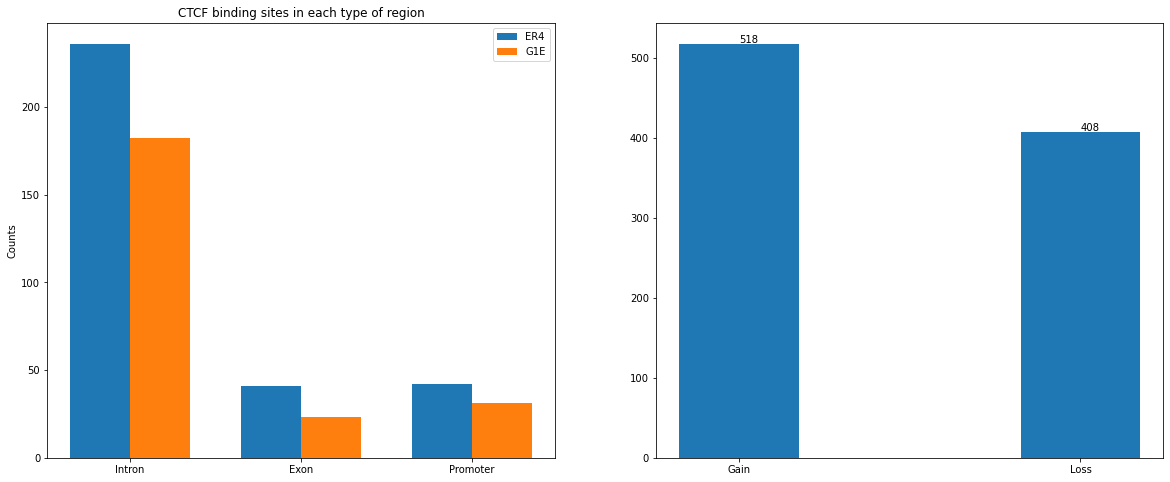

In [80]:
fig,axes = plt.subplots(1,2, figsize = (20,8))

#the number of CTCF binding sites in each type of region
ind = np.arange(3)
width = 0.35
axes[0].bar(ind-width/2, ER4_dict.values(),width,label = "ER4")
axes[0].bar(ind+width/2, G1E_dict.values(),width,label = "G1E")
axes[0].set_xticks(ind)
axes[0].set_xticklabels(('Intron', 'Exon', 'Promoter'))
axes[0].set_ylabel("Counts")
axes[0].legend()
axes[0].set_title("CTCF binding sites in each type of region")

#number of sites lost and gained during differentiation for each cell type
x = ["Gain", "Loss"]
y = [gain_pd.shape[0], loss_pd.shape[0]]
xlocs, xlabs = plt.xticks()
xlocs=[i+1 for i in range(0,2)]
xlabs=[i/2 for i in range(0,2)]
axes[1].bar(x,y, width = 0.35)

for i, v in enumerate(y):
    axes[1].text(xlocs[i] - 1, v + 1, str(v))

